In [23]:
from logicqubit.logic import *
from cmath import *
from scipy.linalg import expm, sinm, cosm, logm, sqrtm
import sympy as sp

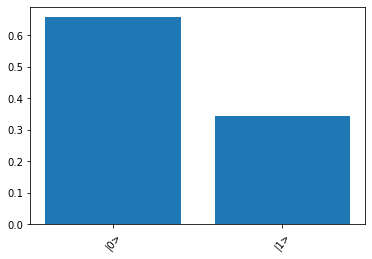

[(0.6576611811976342+0j), (0.3423388188023656+0j)] (0.5850972729404621+0j)


In [24]:
logicQuBit  = LogicQuBit(4)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()
a = Qubit()

x1.X()
#x2.X()
x3.X()

# RY(a)*RY(b) = RY(a+b)
a.CRY(x3, 1/4) # theta 1/8
a.CRY(x2, 1/2) # theta 1/4
a.CRY(x1, 1)   # theta 1/2

res = logicQuBit.Measure([a])
logicQuBit.Plot()
print(res, sqrt(res[1]))

In [18]:
# |x> = |x1x2...xn> => x = 0.x1x2...xn, onde 0 < x < 1
# CRy|x>|0> = |x>(cos(x)|0> + sin(x)|1>)
# para valores pequenos de x, sin(x) ~ x
# CRy|x>|0> = |x>(sqrt(1-x^2)|0> + x|1>)

x = 0/2**1 + 0/2**2 + 1/2**3
print(x,[cos(x)**2,sin(x)**2])

0.125 [(0.9844562108553223+0j), (0.015543789144677609+0j)]


\begin{align}
 R_y|x>|0> = |x>(cos(x)|0> + sin(x)|1>) \\
 x = \sum_{k=1}^{n} x_{k}2^{-k}
\end{align}

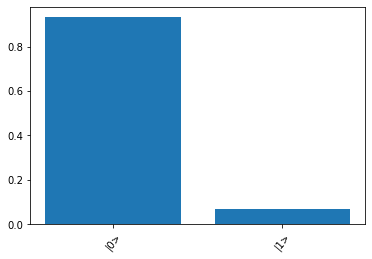

[(0.9330127018922194+0j), (0.06698729810778066+0j)] (0.9659258262890683+0j) (0.25881904510252074+0j)


In [22]:
logicQuBit  = LogicQuBit(2)

x1 = Qubit()
x2 = Qubit()

x1.RY(pi/6)
x2.CX(x1)
#x2.RY(pi/2) # a+b, a-b / 0.70710678

res = logicQuBit.Measure([x2])
logicQuBit.Plot()
print(res, sqrt(res[0]), sqrt(res[1]))

In [29]:
(0.9238795325112867-0.3826834323650898)

0.5411961001461969

In [32]:
sqrt(res[0])-sqrt(res[1])

(-0.5411961001461969+0j)

In [35]:
sqrt(res[0])/0.70710678

(0.5411961010543412+0j)